**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**May, 2022**

Fine annotations of macrophages


----

# Fine annotation of macrophage populations


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/annotation/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

In [3]:
def identityTransfer(adata_CellsNewID, adata, field='identity'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

In [4]:
#Function to add the souporcell id

def add_souporcell_id(adata_obj, cell_id):
    '''
    Function to add the souporcell status (e.g. 0,1, not pooled, etc.) to the cells
    
    Input
        adata_obj: adata object
        cell_id: id of a cell
    
    '''
    
    curr_sample = adata_obj.obs.loc[cell_id, 'sample']
    
    #print('sample',sample, 'barcode', cell_id)
    
    if curr_sample in samples:
        #print(curr_sample)
        #extracts the table contained in the indicated key of the dictionary
        curr_souporcell_table = souporcell_clusters[curr_sample]
        
        if (cell_id in list(curr_souporcell_table.index)): #checking that the cells are into the data
            curr_assign = souporcell_clusters[curr_sample].loc[cell_id,'assignment']
            #print('returning',curr_assign)
            return(curr_assign)

        else:
            # cell barcode is filtered by souporcell
            return('filtered_by_souporcell')
    else:
        return('not_available')

## Loading data

In [88]:
adata= sc.read('../results/scVI/S6_scVIintegrated_adata_latent30_cleanV3_20220523.h5ad')

## ---------


### dMs only

In [26]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'dM1']
temp_cells2= adata[adata.obs['identity'] == 'dM2']
temp_cells3= adata[adata.obs['identity'] == 'M3']

temp_cells = temp_cells.concatenate(temp_cells2,temp_cells3, index_unique=None)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [27]:
#Selecting the cells in the desired clusters
temp_cells2= adata[adata.obs['identity'] == 'HB']

temp_cells = temp_cells.concatenate(temp_cells2,temp_cells3, index_unique=None)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [28]:
del(temp_cells2)
del(temp_cells3)

In [31]:
#LATENT 30
sc.pp.neighbors(temp_cells, n_neighbors=25, use_rep="X_scVI_n_latent_30")
sc.tl.umap(temp_cells)

#clustering
sc.tl.leiden(temp_cells, key_added="leiden_scvi", resolution=0.5)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:36)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:16)


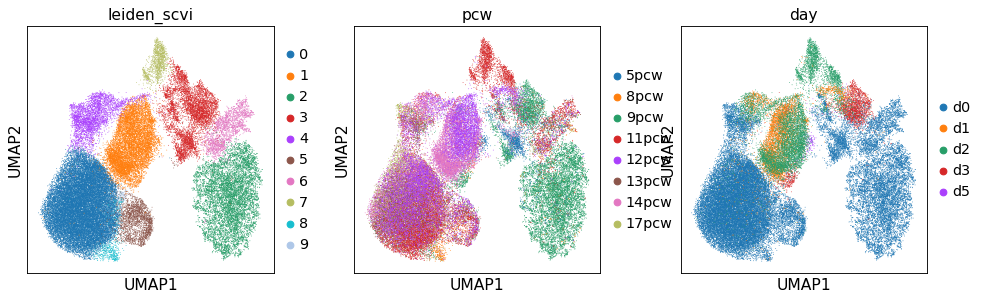

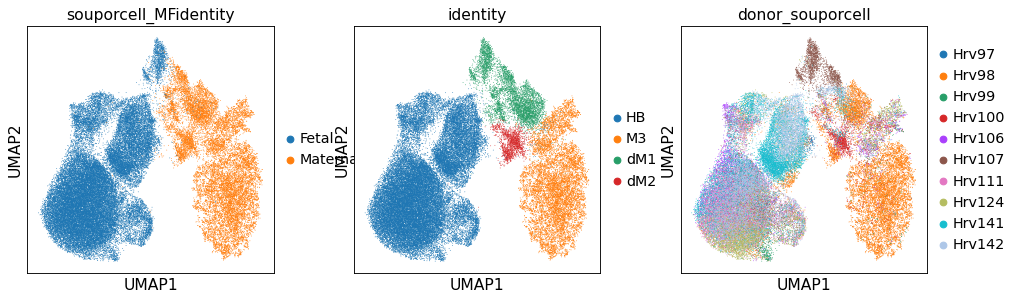

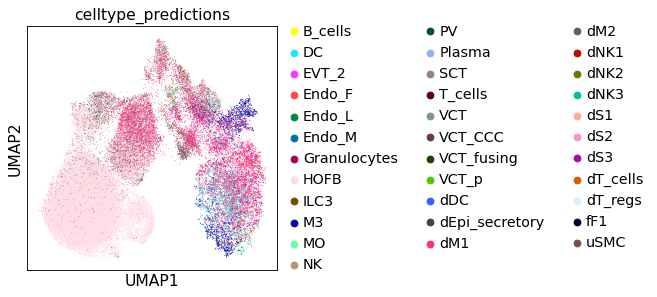

In [32]:
#clustering
sc.pl.umap(temp_cells, color=["leiden_scvi",'pcw','day'])
sc.pl.umap(temp_cells, color=['souporcell_MFidentity','identity','donor_souporcell'])#,save='_scVI_latent30_cleanV3_Macrophages2.pdf')
sc.pl.umap(temp_cells, color=['celltype_predictions'])#,save='_scVI_latent30_cleanV3_Macrophages2.pdf')




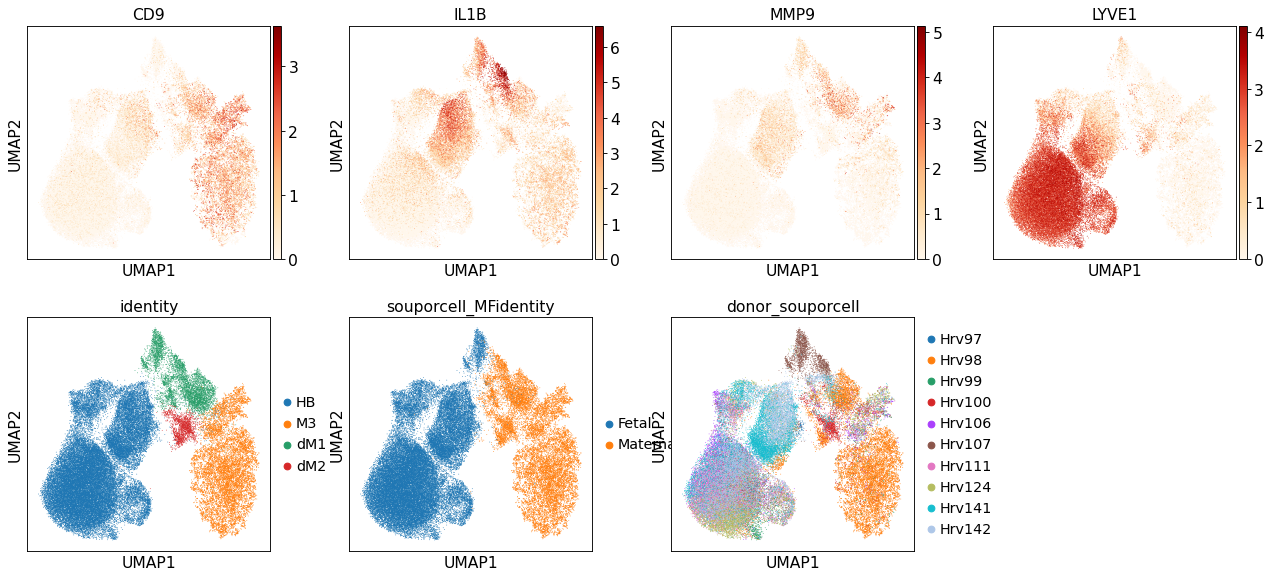

In [33]:
sc.pl.umap(temp_cells, color=['CD9', 'IL1B', 'MMP9','LYVE1',
                         'identity','souporcell_MFidentity','donor_souporcell'],color_map='OrRd', save='_scVI_latent30_cleanV3_Macrophages_markersM3.pdf')

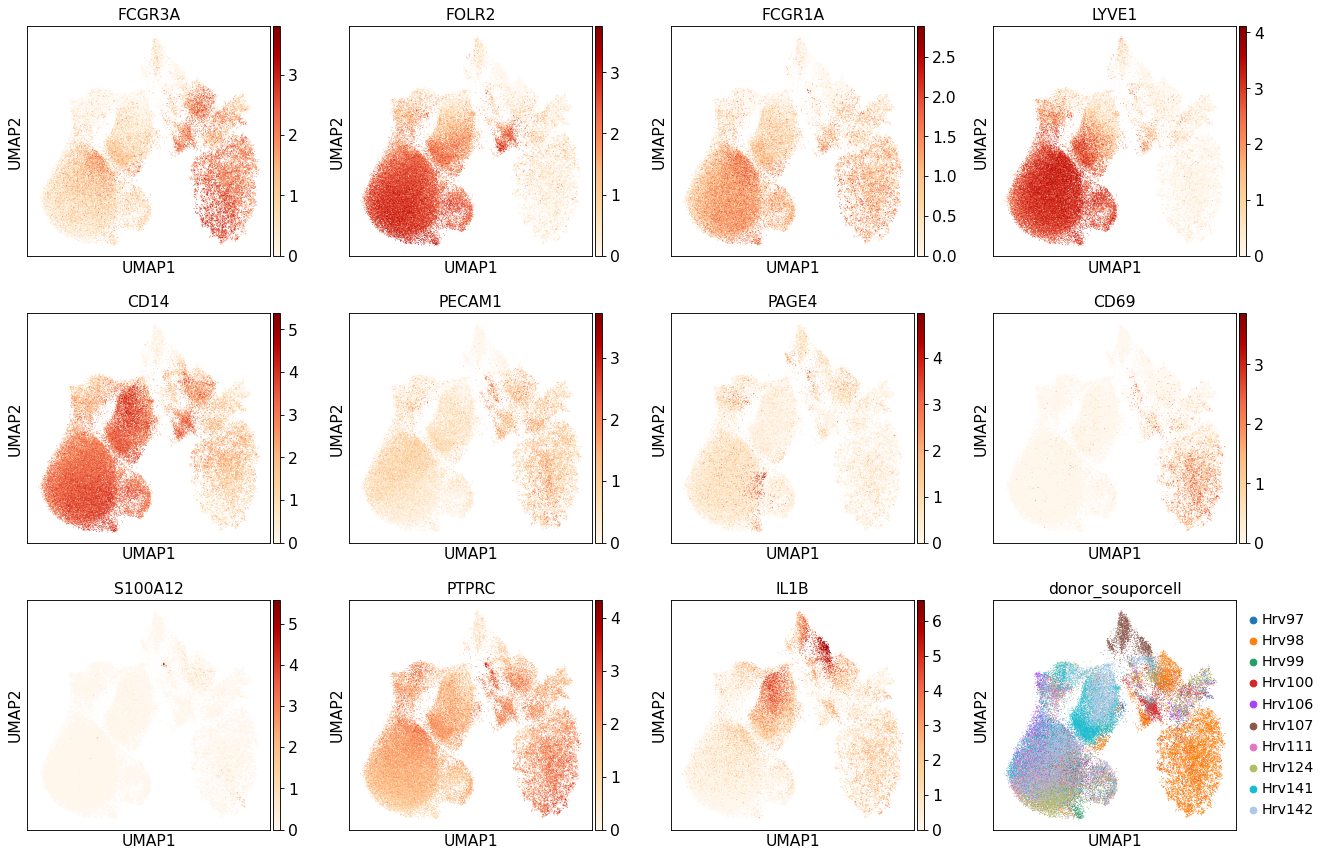

In [34]:
sc.pl.umap(temp_cells, color=['FCGR3A', 'FOLR2', 'FCGR1A', 'LYVE1', 'CD14','PECAM1','PAGE4',
                         'CD69', 'S100A12','PTPRC','IL1B','donor_souporcell'],color_map='OrRd')

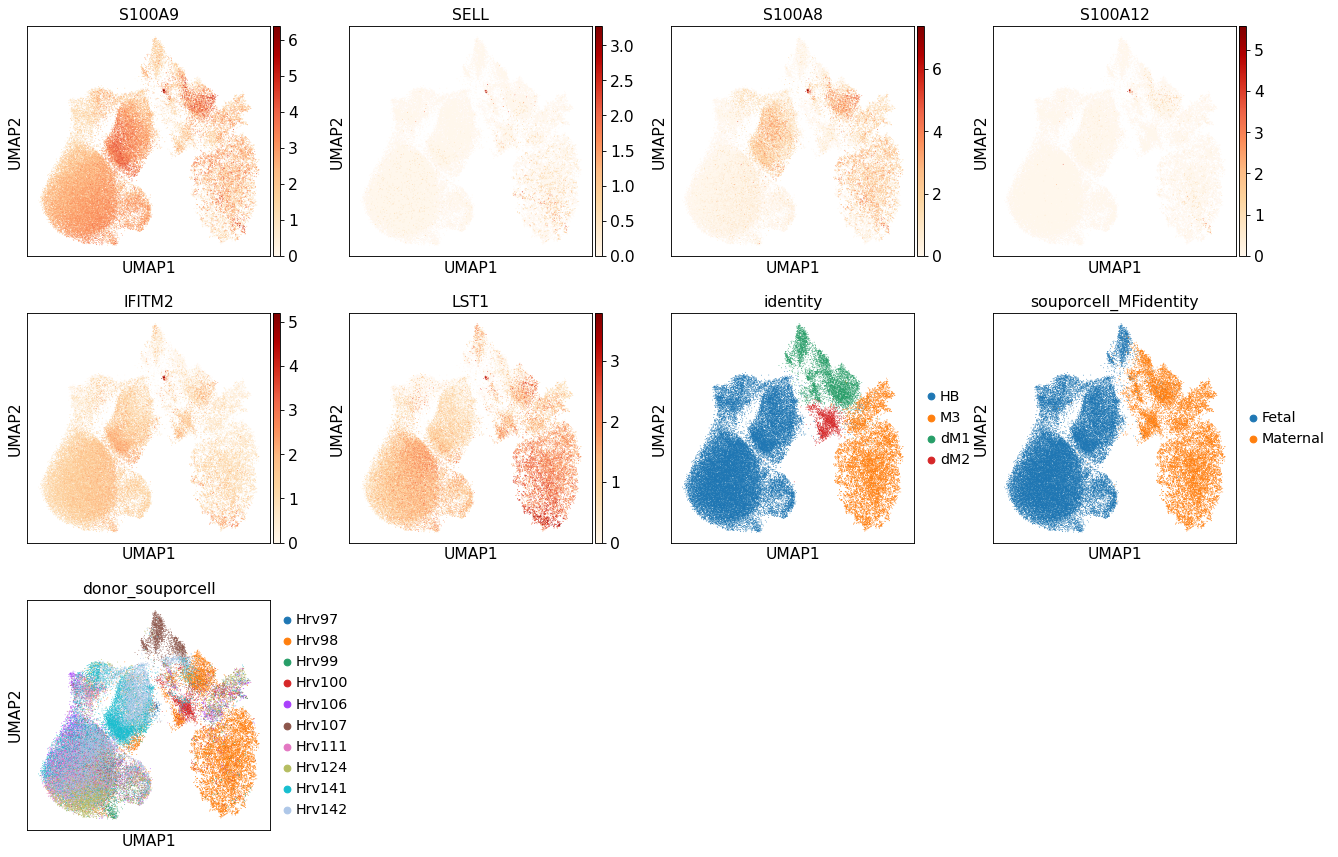

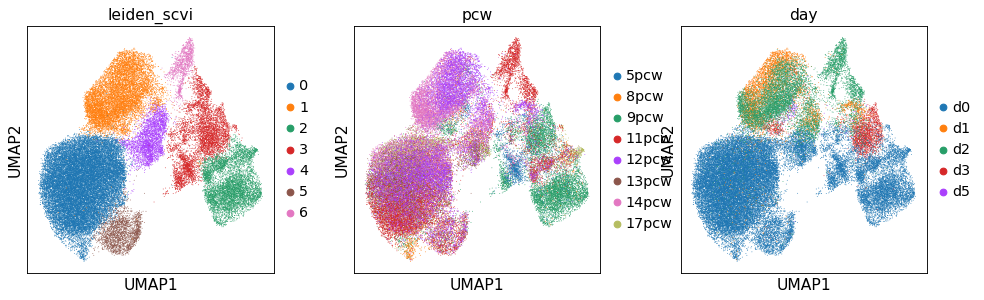

In [23]:
sc.pl.umap(temp_cells, color=["leiden_scvi",'pcw','day'])

In [87]:
adata.obs

sample          donor  \
Pla_HDBR10917729_AAACCCAGTAAGACCG  Pla_HDBR10917729          Hrv97   
Pla_HDBR10917729_AAACGAAAGCCTAACT  Pla_HDBR10917729          Hrv97   
Pla_HDBR10917729_AAACGAACAAGGGTCA  Pla_HDBR10917729          Hrv97   
Pla_HDBR10917729_AAACGAACATAGATCC  Pla_HDBR10917729          Hrv97   
Pla_HDBR10917729_AAACGAATCACTGCTC  Pla_HDBR10917729          Hrv97   
...                                             ...            ...   
Pla_HDBR12808831_TTTGTTGGTACACGCC  Pla_HDBR12808831  Hrv141+Hrv142   
Pla_HDBR12808831_TTTGTTGGTGCTGATT  Pla_HDBR12808831  Hrv141+Hrv142   
Pla_HDBR12808831_TTTGTTGTCCAAGAGG  Pla_HDBR12808831  Hrv141+Hrv142   
Pla_HDBR12808831_TTTGTTGTCTCGACGG  Pla_HDBR12808831  Hrv141+Hrv142   
Pla_HDBR12808831_TTTGTTGTCTGTGCTC  Pla_HDBR12808831  Hrv141+Hrv142   

                                  termination day    pcw  percent_mito  \
Pla_HDBR10917729_AAACCCAGTAAGACCG     medical  d5   5pcw      0.008159   
Pla_HDBR10917729_AAACGAAAGCCTAACT     medical  d5   5pcw      0.047304   
Pla_HDBR10917729_AAACGAACAAGGGTCA     medical  d5   5pcw      0.045066   
Pla_HDBR10917729_AAACGAACATAGATCC     medical  d5   5pcw      0.031816   
Pla_HDBR10917729_AAACGAATCACTGCTC     medical  d5   5pcw      0.058388   
...                                       ...  ..    ...           ...   
Pla_HDBR12808831_TTTGTTGGTACACGCC    surgical  d2  12pcw      0.002298   
Pla_HDBR12808831_TTTGTTGGTGCTGATT    surgical  d2  14pcw      0.027886   
Pla_HDBR12808831_TTTGTTGTCCAAGAGG    surgical  d2  12pcw      0.077964   
Pla_HDBR12808831_TTTGTTGTCTCGACGG    surgical  d2  12pcw      0.021751   
Pla_HDBR12808831_TTTGTTGTCTGTGCTC    surgical  d2  14pcw      0.039958   

                                   n_counts batch  n_genes  \
Pla_HDBR10917729_AAACCCAGTAAGACCG     858.0     0      449   
Pla_HDBR10917729_AAACGAAAGCCTAACT    3023.0     0     1178   
Pla_HDBR10917729_AAACGAACAAGGGTCA   32996.0     0     5381   
Pla_HDBR10917729_AAACGAACATAGATCC   27062.0     0     5202   
Pla_HDBR10917729_AAACGAATCACTGCTC   26067.0     0     5757   
...                                     ...   ...      ...   
Pla_HDBR12808831_TTTGTTGGTACACGCC   25677.0    15     4484   
Pla_HDBR12808831_TTTGTTGGTGCTGATT    2044.0    15     1141   
Pla_HDBR12808831_TTTGTTGTCCAAGAGG   14404.0    15     4058   
Pla_HDBR12808831_TTTGTTGTCTCGACGG   19355.0    15     4116   
Pla_HDBR12808831_TTTGTTGTCTGTGCTC   23550.0    15     5239   

                                                      sample_barcode  ...  \
Pla_HDBR10917729_AAACCCAGTAAGACCG  Pla_HDBR10917729_AAACCCAGTAAGACCG  ...   
Pla_HDBR10917729_AAACGAAAGCCTAACT  Pla_HDBR10917729_AAACGAAAGCCTAACT  ...   
Pla_HDBR10917729_AAACGAACAAGGGTCA  Pla_HDBR10917729_AAACGAACAAGGGTCA  ...   
Pla_HDBR10917729_AAACGAACATAGATCC  Pla_HDBR10917729_AAACGAACATAGATCC  ...   
Pla_HDBR10917729_AAACGAATCACTGCTC  Pla_HDBR10917729_AAACGAATCACTGCTC  ...   
...                                                              ...  ...   
Pla_HDBR12808831_TTTGTTGGTACACGCC  Pla_HDBR12808831_TTTGTTGGTACACGCC  ...   
Pla_HDBR12808831_TTTGTTGGTGCTGATT  Pla_HDBR12808831_TTTGTTGGTGCTGATT  ...   
Pla_HDBR12808831_TTTGTTGTCCAAGAGG  Pla_HDBR12808831_TTTGTTGTCCAAGAGG  ...   
Pla_HDBR12808831_TTTGTTGTCTCGACGG  Pla_HDBR12808831_TTTGTTGTCTCGACGG  ...   
Pla_HDBR12808831_TTTGTTGTCTGTGCTC  Pla_HDBR12808831_TTTGTTGTCTGTGCTC  ...   

                                  _scvi_labels _scvi_local_l_mean  \
Pla_HDBR10917729_AAACCCAGTAAGACCG            0           9.330803   
Pla_HDBR10917729_AAACGAAAGCCTAACT            0           9.330803   
Pla_HDBR10917729_AAACGAACAAGGGTCA            0           9.330803   
Pla_HDBR10917729_AAACGAACATAGATCC            0           9.330803   
Pla_HDBR10917729_AAACGAATCACTGCTC            0           9.330803   
...                                        ...                ...   
Pla_HDBR12808831_TTTGTTGGTACACGCC            0           9.661806   
Pla_HDBR12808831_TTTGTTGGTGCTGATT            0           9.532544   
Pla_HDBR12808831_TTTGTTG

### Macrophages re-annotation
Some mistakes are visible with the SoC deconvolution. Here I will ammend them.

In [89]:
dM = adata[adata.obs['identity'] == 'dM1']
temp_cells2= adata[adata.obs['identity'] == 'dM2']
temp_cells3= adata[adata.obs['identity'] == 'M3']


dM = dM.concatenate(temp_cells2,temp_cells3, index_unique=None)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [90]:
#LATENT 30
sc.pp.neighbors(dM, n_neighbors=25, use_rep="X_scVI_n_latent_30")
sc.tl.umap(dM)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


running Leiden clustering
    finished: found 7 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:00)
... storing 'sample' as categorical
... storing 'donor' as categorical
... storing 'day' as categorical
... storing 'souporcell_id' as categorical
... storing 'donor_deconv' as categorical
... storing 'donor_souporcell' as categorical
... storing 'celltype_predictions' as categorical
... storing 'souporcell_MFgenotype' as categorical
... storing 'identity' as categorical


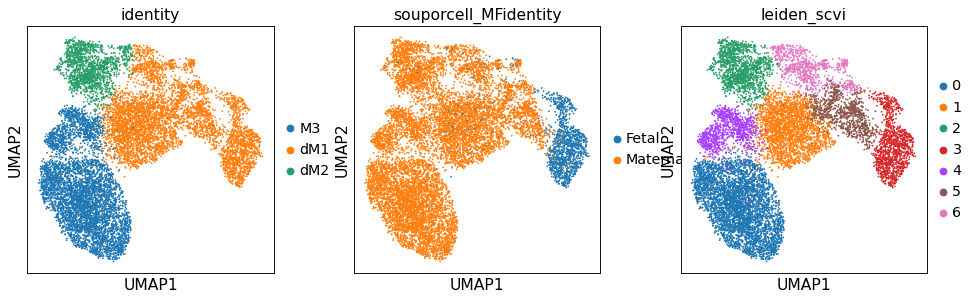

In [91]:
#clustering
sc.tl.leiden(dM, key_added="leiden_scvi", resolution=0.5)
sc.pl.umap(dM, color=['identity','souporcell_MFidentity','leiden_scvi'],color_map='OrRd')

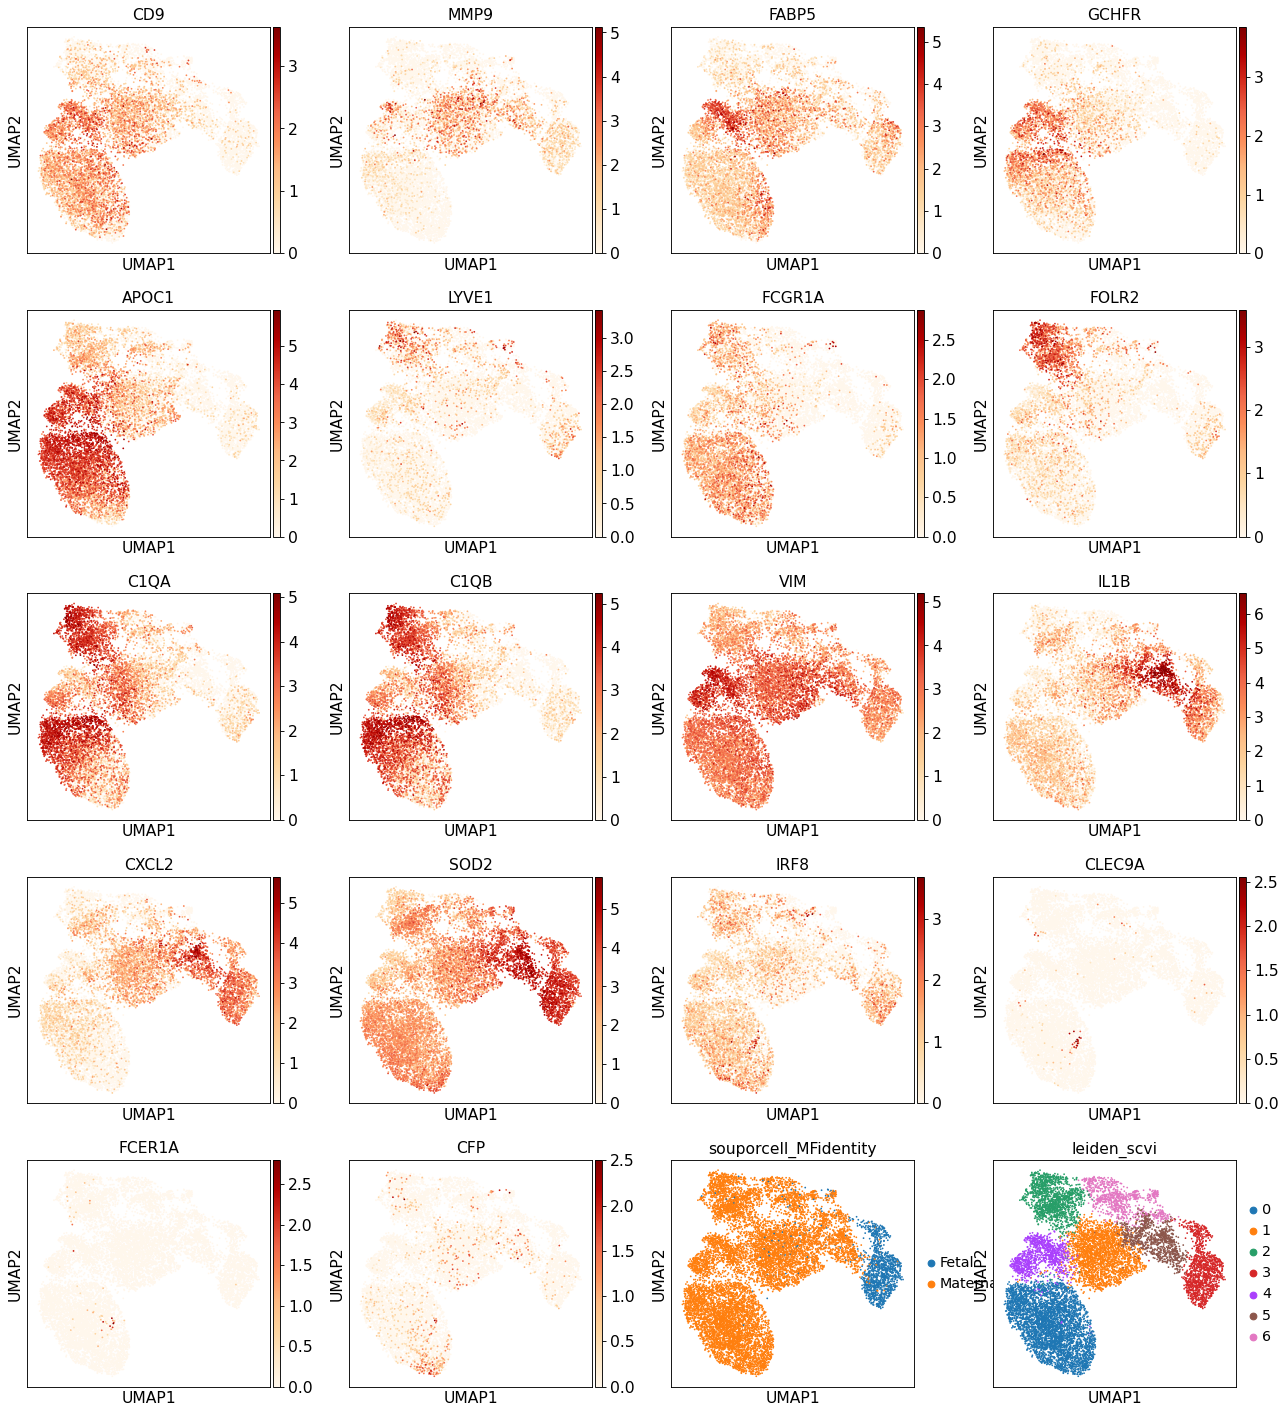

In [92]:
sc.pl.umap(dM, color=['CD9', 'MMP9','FABP5','GCHFR','APOC1',#M3
                      'LYVE1','FCGR1A',#HB
                      'FOLR2', #HB & dM2
                      'C1QA', 'C1QB','VIM',#dM2. VIM low/neg
                      'IL1B','CXCL2', 'SOD2', #dM1
                      'IRF8','CLEC9A', #DC1
                      'FCER1A','CFP',#DC2
                         'souporcell_MFidentity','leiden_scvi'], color_map='OrRd')

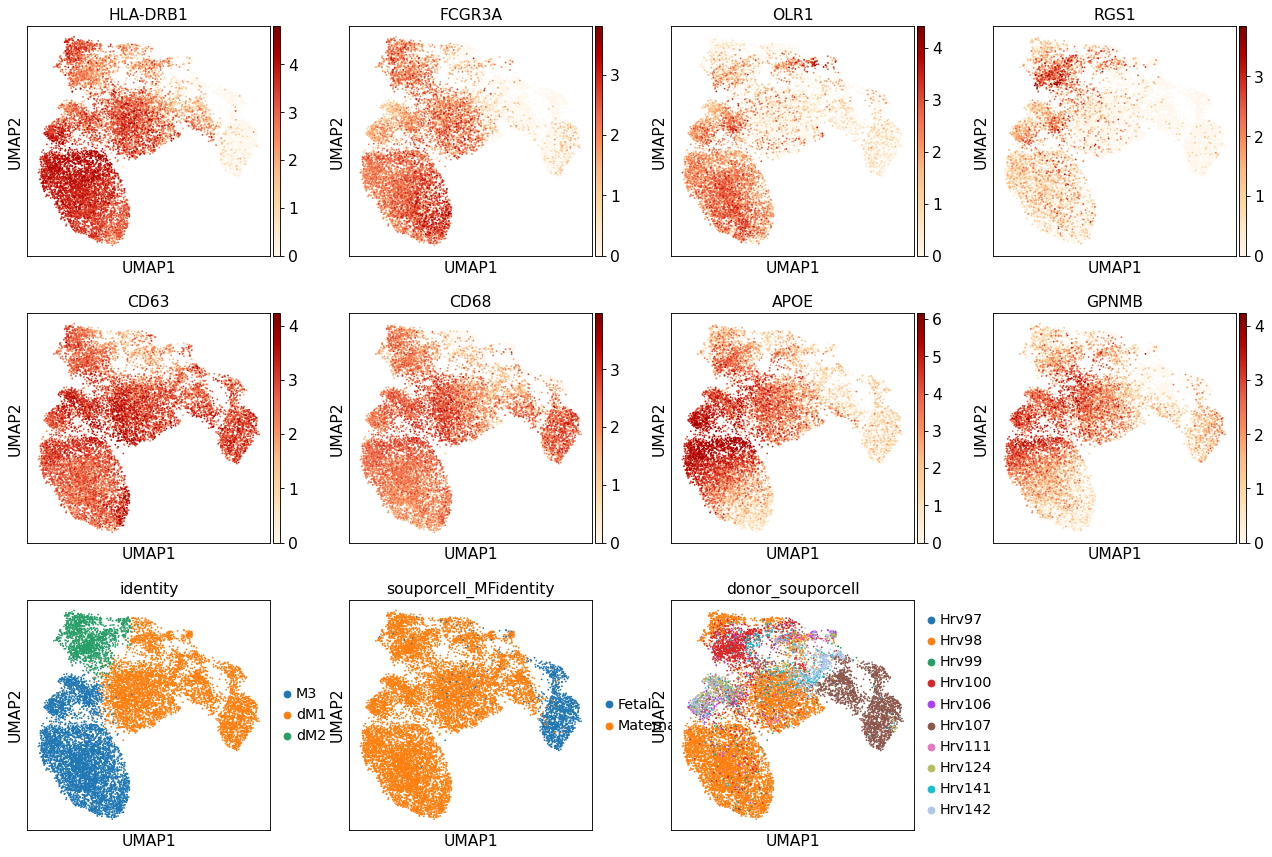

In [93]:
sc.pl.umap(dM, color=['HLA-DRB1', 'FCGR3A', 'OLR1','RGS1','CD63','CD68',
                              'APOE','GPNMB',
            'identity','souporcell_MFidentity','donor_souporcell'],color_map='OrRd',
            save='_scVI_latent30_cleanV3_Macrophages_markersPAMM1a.pdf')

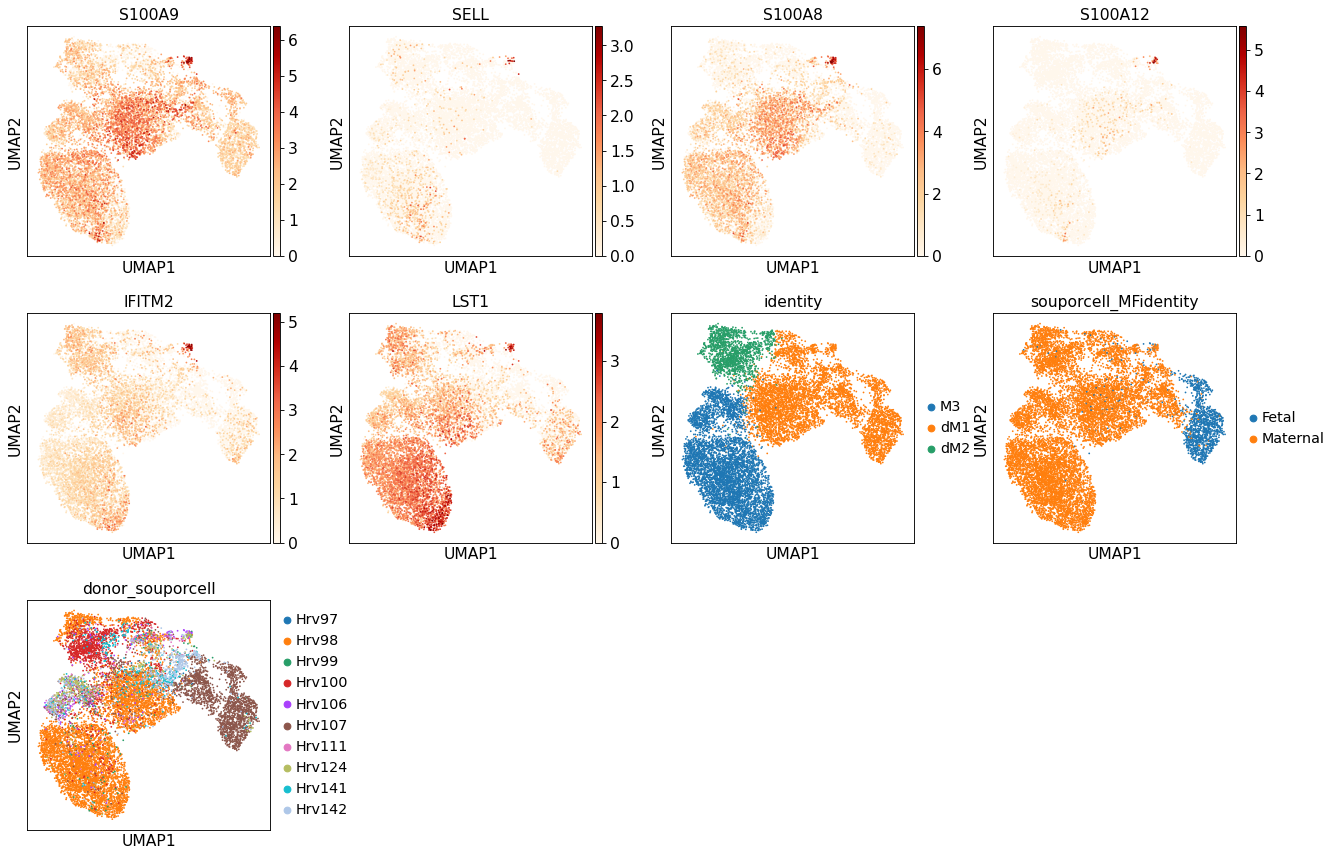

In [94]:
sc.pl.umap(dM, color=['S100A9', 'SELL', 'S100A8','S100A12','IFITM2','LST1',
            'identity','souporcell_MFidentity','donor_souporcell'],color_map='OrRd',
            save='_scVI_latent30_cleanV3_Macrophages_markersPAMM1b.pdf')

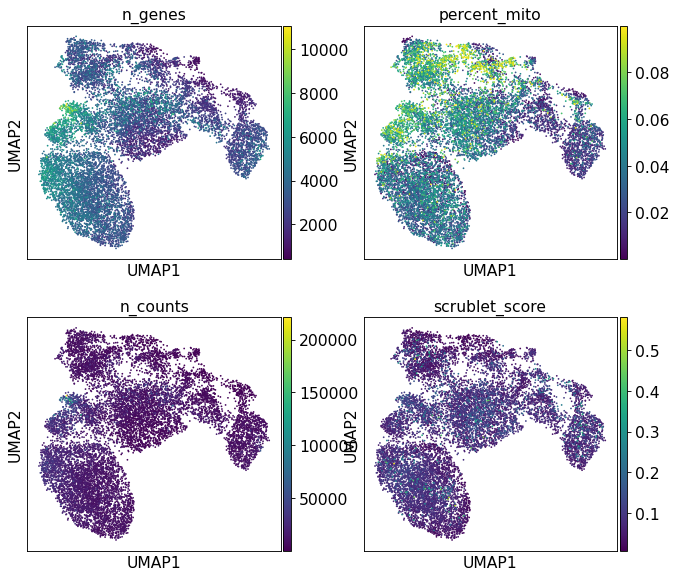

In [95]:
# use scVI imputed values for plotting
sc.pl.umap(dM, color=["n_genes",'percent_mito','n_counts',
                         'scrublet_score' ], ncols=2)

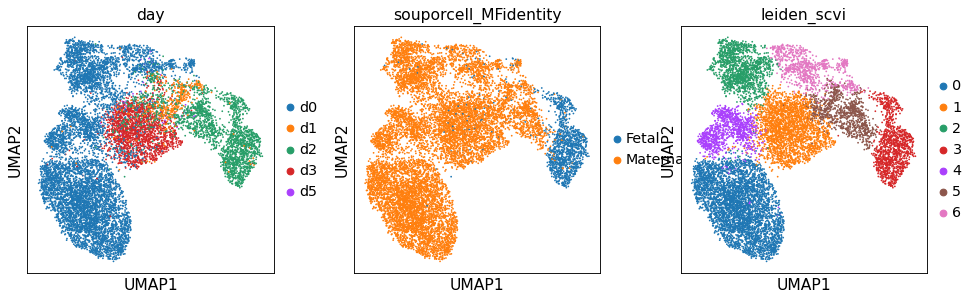

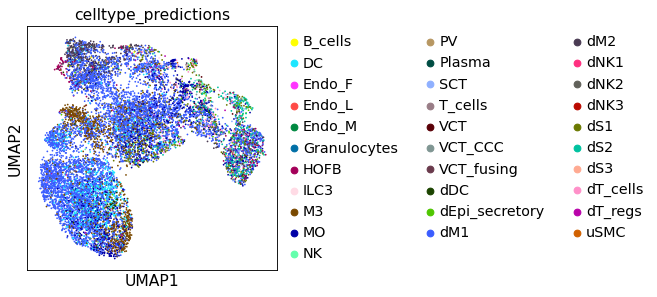

In [97]:
sc.pl.umap(dM, color=['day','souporcell_MFidentity','leiden_scvi'], color_map='OrRd')

sc.pl.umap(dM, color=['celltype_predictions'], color_map='OrRd')

In [98]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
dM.obs['identity']= dM.obs['leiden_scvi']


#Function that changes the cluster names as indicated
dM.obs['identity'] = (dM.obs["leiden_scvi"].map(lambda x: 
                            { "0": "dM2", "1": "M3", "2": "dM2", "3": "HB", "4": "M3","5": "dM1", "6": "dM1"}
                            .get(x, x)).astype("category"))

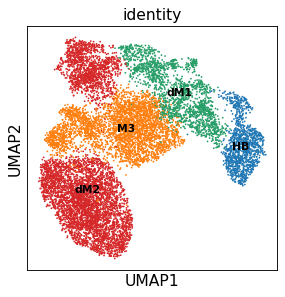

In [99]:
# use scVI imputed values for plottin
sc.pl.umap(dM, color=['identity' ], legend_loc='on data',legend_fontsize='x-small')

In [83]:
dM

AnnData object with n_obs × n_vars = 17185 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'identity_colors', 'souporcell_MFidentity_colors', 'leiden_scvi_colors', 'neighbors', 'umap', 'leiden', 'day_colors', 'celltype_predictions_colors', 'donor_souporcell_colors'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

In [100]:
adata= identityTransfer(dM, adata)

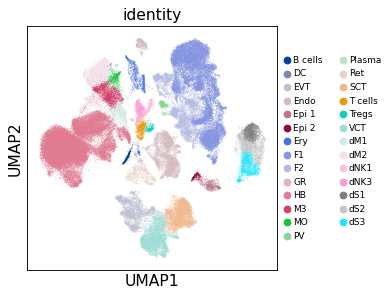

In [101]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',
           save='_scVI_latent30_cleanV3.pdf')

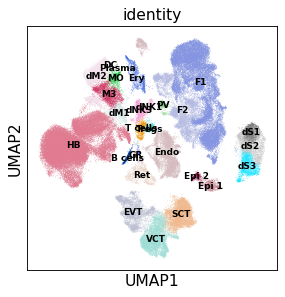

In [103]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',legend_loc= 'on data',
           save='_scVI_latent30_cleanV3_ondata.pdf')

In [97]:
del(dM1)
del(temp_cells)

In [104]:
adata.write('../results/scVI/S6_scVIintegrated_adata_latent30_cleanV3_20220523.h5ad')

In [2]:
#sc.read('../results/scVI/S6_scVIintegrated_adata_latent30_cleanV3_20220523.h5ad')

AnnData object with n_obs × n_vars = 134450 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: '_scvi', 'celltype_predictions_colors', 'day_colors', 'donor_souporcell_colors', 'identity_colors', 'leiden', 'leiden_scvi_colors', 'neighbors', 'pcw_colors', 'sample_colors', 'scrublet_doublet_colors', 'souporcell_MFidentity_colors', 'termination_colors', 'umap'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_